In [1]:
using Revise

In [2]:
using ColorSchemes
using Plots
using SignedDistanceFunctions

[ Info: Precompiling SignedDistanceFunctions [5d155b53-3349-4453-ad1f-ebdf13404c93]


In [17]:
# Rasterise all plot; should play more nicely with previewing in GitHub.
gr(; fmt=:png);

In [18]:
function plot_sdf(g::Geometry{2})
    xs = -7.0:0.05:7.0
    ys = -5.0:0.05:5.0
    
    # NOTE That this is indexed as (y, x).
    data = Matrix{Float64}(undef, (length(ys), length(xs)))
    
    @inbounds for (j, x) in enumerate(xs)
        for (i, y) in enumerate(ys)
            data[i, j] = signed_distance(g, (x, y))
        end
    end
    
    # Compute colour gradient changeover point.
    # This is trying to make "0" always align with white in our scale.
    minv, maxv = extrema(data)
    changeover_point = if minv >= 0
        # A very small number; it has to be greater than 0 for `cgrad` to work.
        changeover_point = 1e-5
    elseif maxv <= 0
        # Zero isn't bounded by our data range, at which point we give up.
        0.5
    else
        - minv / (maxv - minv)
    end
    colour_gradient = cgrad([:blue, :white, :red], [0, changeover_point, 1])
    
    return heatmap(xs, ys, data; aspect_ratio=:equal, color=colour_gradient)
end
;

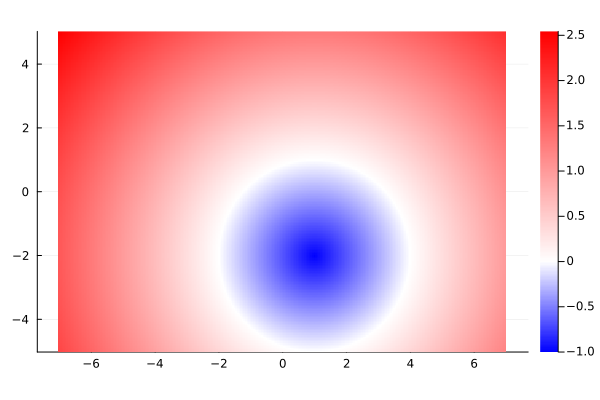

In [11]:
g = shift(scale(Sphere{2}(), 3.0), (1.0, -2.0))
plot_sdf(g)

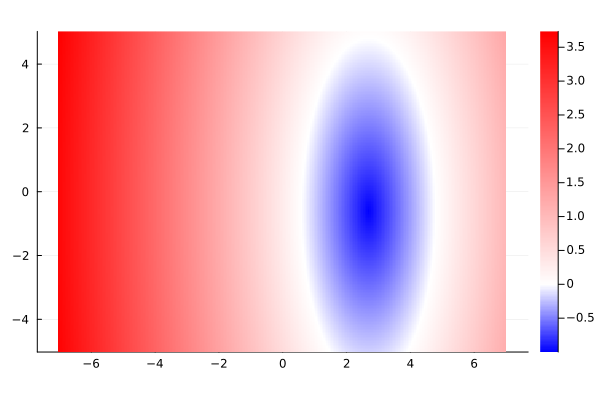

In [12]:
g2 = shift(scale(g, (0.7, 1.8)), (2.0, 3.0))
plot_sdf(g2)

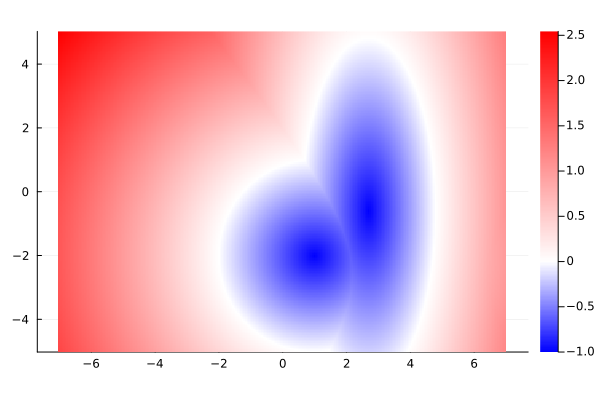

In [13]:
g3 = union(g, g2)
plot_sdf(g3)

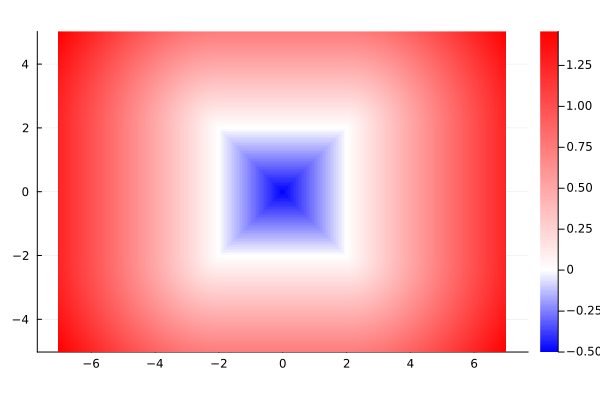

In [14]:
g4 = scale(Cube{2}(), 4.0)
plot_sdf(g4)

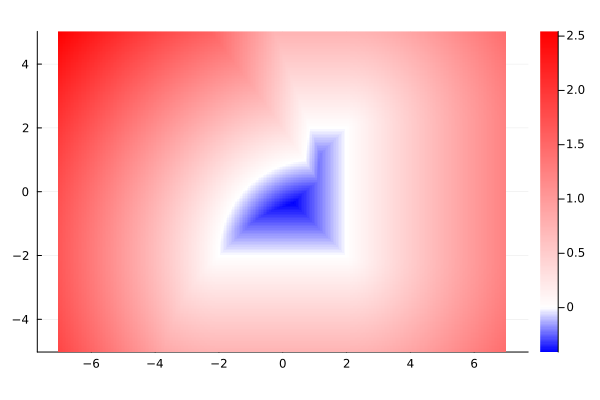

In [15]:
g5 = intersect(g3, g4)
plot_sdf(g5)